In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import pynapple as nap

import pandas_method
import numpy_method
import pynapple_method
import ibl_method

import importlib

import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache


ModuleNotFoundError: No module named 'naive_method'

In [ ]:
import os

data_storage_directory = "/mnt/nvme0/ecephys_cache_dir_2"

manifest_path = os.path.join(data_storage_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)


In [ ]:
sessions = cache.get_session_table()

session = cache.get_session_data(sessions.index.values[0])

In [ ]:
probe_id = session.probes[session.probes.description == 'probeE'].index.values[0]

lfp = session.get_lfp(probe_id)

In [ ]:
lfp

<xarray.DataArray 'LFP' (time: 12028993, channel: 95)>
array([[-2.43750e-05, -3.08100e-05, -3.19800e-05, ..., -1.95000e-07,
        -1.34550e-05, -1.15050e-05],
       [-4.44600e-05, -3.31500e-05, -1.42350e-05, ...,  1.95000e-06,
        -2.49600e-05, -1.34550e-05],
       [-4.58250e-05,  1.17000e-06, -1.42350e-05, ...,  1.36500e-06,
        -1.03350e-05, -1.71600e-05],
       ...,
       [-9.59400e-05, -1.54245e-04, -1.06275e-04, ...,  4.89450e-05,
         0.00000e+00,  4.09500e-06],
       [-1.93050e-05, -7.17600e-05, -4.25100e-05, ...,  6.10350e-05,
        -9.75000e-07,  1.15050e-05],
       [-2.73000e-05, -7.21500e-05, -6.24000e-05, ...,  3.04200e-05,
        -1.95000e-06, -1.95000e-07]], dtype=float32)
Coordinates:
  * time     (time) float64 13.58 13.58 13.58 ... 9.637e+03 9.637e+03 9.637e+03
  * channel  (channel) int64 850258492 850258500 ... 850259236 850259244

In [ ]:
presentation_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == 'flashes']

presentation_times = presentation_table.start_time.values
presentation_ids = presentation_table.index.values

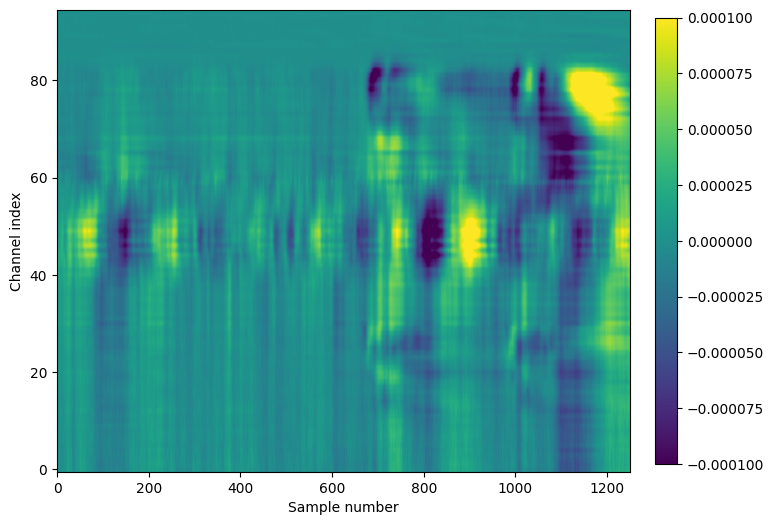

In [ ]:
importlib.reload(pandas_method)

aligned_lfp = pandas_method.align_lfp(
    lfp,
    presentation_times,
    (-0.5, 0.5)
)

plt.figure(figsize=(8,6))
im = plt.imshow(aligned_lfp.mean(dim='presentation_id'), aspect='auto', origin='lower', vmin=-1e-4, vmax=1e-4)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

In [ ]:
import cProfile, pstats, io
from pstats import SortKey

pr = cProfile.Profile()
pr.enable()
aligned_lfp = pandas_method.align_lfp(
    lfp,
    presentation_times,
    (-0.5,0.5)
)
pr.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         7621 function calls (7456 primitive calls) in 0.076 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.027    0.013    0.027    0.014 /home/joshs/anaconda3/envs/visual-behavior-neuropixels/lib/python3.8/site-packages/pandas/core/indexes/base.py:3876(_get_fill_indexer)
        1    0.019    0.019    0.019    0.019 /home/joshs/anaconda3/envs/visual-behavior-neuropixels/lib/python3.8/site-packages/xarray/core/indexing.py:1274(__getitem__)
        8    0.003    0.000    0.003    0.000 {method 'take' of 'numpy.ndarray' objects}
    46/36    0.002    0.000    0.006    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.002    0.002    0.002    0.002 /home/joshs/GitHub/visual-behavior-neuropixels/pandas_method.py:101(<listcomp>)
        6    0.002    0.000    0.002    0.000 {method 'repeat' of 'numpy.ndarray' objects}
       31    0.002    0.000    0.002    0.000 {metho

(1250, 95, 150)


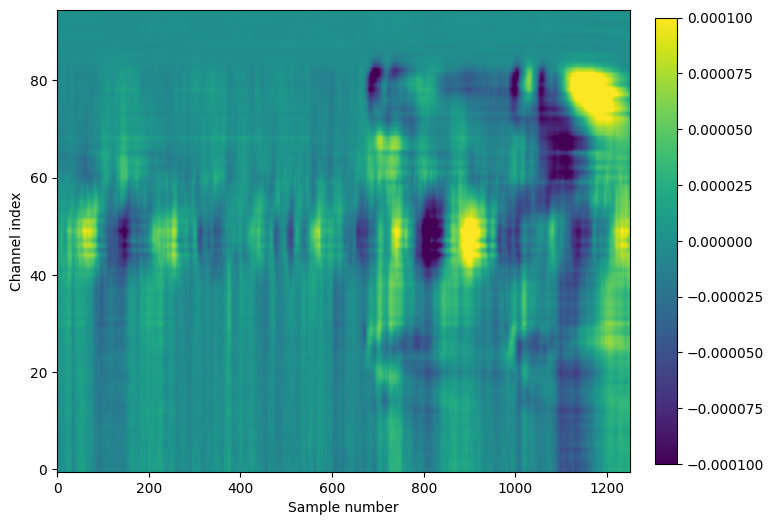

In [ ]:
importlib.reload(naive_method)

ts, aligned_data = naive_method.align_lfp(
    lfp.time,
    lfp.data,
    presentation_times,
    (-0.5, 0.5)
)

print(aligned_data.shape)

plt.figure(figsize=(8,6))
im = plt.imshow(np.mean(aligned_data,2).T, aspect='auto', origin='lower', vmin=-1e-4, vmax=1e-4)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

In [ ]:
import cProfile, pstats, io
from pstats import SortKey

pr = cProfile.Profile()
pr.enable()
ts, aligned_data = naive_method.align_lfp(
    lfp.time,
    lfp.data,
    presentation_times,
    (-0.5,0.5)
)
pr.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         7876 function calls (7556 primitive calls) in 0.102 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  302/301    0.092    0.000    0.099    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
      300    0.002    0.000    0.002    0.000 {method 'searchsorted' of 'numpy.ndarray' objects}
  603/302    0.001    0.000    0.002    0.000 {built-in method numpy.asarray}
        1    0.001    0.001    0.101    0.101 /home/joshs/GitHub/visual-behavior-neuropixels/naive_method.py:50(align_lfp)
      301    0.001    0.000    0.001    0.000 /home/joshs/anaconda3/envs/visual-behavior-neuropixels/lib/python3.8/site-packages/xarray/core/indexing.py:1391(__array__)
      300    0.000    0.000    0.006    0.000 /home/joshs/anaconda3/envs/visual-behavior-neuropixels/lib/python3.8/site-packages/numpy/core/fromnumeric.py:51(_wrapfunc)
      302    0.000    0.000    0.003    0.000 /home/joshs/anaconda3/envs/v

In [ ]:
importlib.reload(pynapple_method)

tref = nap.Ts(presentation_times)

group = { }

for ch in lfp.channel.values:

    group[ch] = nap.Tsd(lfp.time.values, lfp.sel(channel = ch).data)

data = nap.TsGroup(group)

result = pynapple_method.compute_perievent(data, 
    tref, 
    (1, 1.5))

In [ ]:
import cProfile, pstats, io
from pstats import SortKey

pr = cProfile.Profile()
pr.enable()
result = pynapple_method.compute_perievent(data, 
    tref, 
    (1, 1.5))
pr.disable()
s = io.StringIO()
sortby = SortKey.TIME
ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
ps.print_stats()
print(s.getvalue())

         111346125 function calls (110273187 primitive calls) in 586.934 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       95  435.175    4.581  435.181    4.581 /home/joshs/GitHub/visual-behavior-neuropixels/pynapple_method.py:7(align_to_event)
    85785   29.664    0.000   30.027    0.000 /home/joshs/anaconda3/envs/visual-behavior-neuropixels/lib/python3.8/site-packages/pandas/core/generic.py:5517(__finalize__)
   300488   21.363    0.000   42.246    0.000 /home/joshs/anaconda3/envs/visual-behavior-neuropixels/lib/python3.8/site-packages/pandas/core/generic.py:5577(__setattr__)
   171856   19.912    0.000   20.282    0.000 /home/joshs/anaconda3/envs/visual-behavior-neuropixels/lib/python3.8/site-packages/pandas/core/generic.py:5561(__getattr__)
 24878231    5.019    0.000    7.635    0.000 {built-in method builtins.isinstance}
   727804    2.642    0.000    2.642    0.000 {method 'reduce' of 'numpy.ufunc' objects}
  